# If additional packages need to be used, uncomment the last two lines of this cell and replace <package list> with 
# a list of additional packages.
# This will ensure the notebook has all the dependencies satisfied and works everywhere.

#import sys
#!{sys.executable} -m pip install <package list>

### Libraries

In [357]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings

pd.set_option('display.float_format', lambda num:'%1.3f'%num)
pd.set_option('display.max_columns', 99)
filterwarnings('ignore')

# Data Description

Feature | Description
:---|:---
app_id |The unique application id.
category | The category under which app is categorized on the store.
reviews| The number of reviews received on the store.
size| Size of the app available for download (in KB/MB)
installs| The number of people who had installed this app atleast once.
price| The price of the app (in US $)
suitable_for| Rating given to app based on the usage and content.
last_update| When was the app updated last time by the developers.
latest_ver| The latest version of the app available for download.
popularity| User popularity (High/Low)

# Data Wrangling & Visualization 




In [358]:
#read the training data
train = pd.read_csv("train.csv")

In [359]:
#check the top 5 rows of the training data
train.head()

,app_id,category,reviews,size,installs,price,suitable_for,last_update,latest_ver,popularity
0,330090,PERSONALIZATION,4,511k,50+,0,Everyone,"December 31, 2016",1.4,High
1,226147,GAME,568391,5.2M,"5,000,000+",0,Teen,"July 1, 2014",4.3.1,High
2,107000,FAMILY,144,70M,"1,000+",$2.99,Teen,"January 26, 2018",1.0.0,High
3,217582,FAMILY,1499466,96M,"10,000,000+",0,Teen,"July 24, 2018",1.25.0,High
4,370113,DATING,84,4.5M,"1,000+",0,Mature 17+,"July 6, 2018",8.2,High


In [360]:
#Explore columns
train.columns

Index(['app_id', 'category', 'reviews', 'size', 'installs', 'price',
       'suitable_for', 'last_update', 'latest_ver', 'popularity'],
      dtype='object')

In [361]:
#Description
train.describe()

,app_id,reviews
count,1975.000,1975.000
mean,490685.787,198816.163
std,288098.937,1494090.662
min,1160.000,1.000
25%,239249.500,33.000
50%,481867.000,516.000
75%,737373.500,19122.000
max,999218.000,44891723.000


In [362]:
#get object/data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1975 entries, 0 to 1974
Data columns (total 10 columns):
app_id          1975 non-null int64
category        1975 non-null object
reviews         1975 non-null int64
size            1975 non-null object
installs        1975 non-null object
price           1975 non-null object
suitable_for    1975 non-null object
last_update     1975 non-null object
latest_ver      1971 non-null object
popularity      1975 non-null object
dtypes: int64(2), object(8)
memory usage: 154.4+ KB


In [363]:
#get the shape of the training data, and testing data
train.shape #1975x10

(1975, 10)

In [364]:
#check if there are null entries
# check if there is any null value in the first place
train.isnull().values.any() #True

train.isnull().sum() #latest_ver = 4


app_id          0
category        0
reviews         0
size            0
installs        0
price           0
suitable_for    0
last_update     0
latest_ver      4
popularity      0
dtype: int64

In [365]:
#get the count of the predictor variable to check imbalanced dataset or not
train['popularity'].value_counts()

#train['category'].value_counts()
print(len(pd.unique(train['category'])))

#train['suitable_for'].value_counts()

33


In [366]:
#create dummy variables for the category clm, concateting with the train dataset, and droping the original category clm
dummy_category = pd.get_dummies(train[['category']], drop_first=True)
dummy_category.head()
dummy_category.shape

train = pd.concat([train, dummy_category], axis=1)
train = train.drop(['category'], axis=1)
train.head()
train.shape



(1975, 41)

In [367]:
#create dummy variables for the suitable_for clm, concateting with the train dataset, and droping the original category clm

dummy_suitable = pd.get_dummies(train[['suitable_for']], drop_first=True)
dummy_suitable.head()
dummy_suitable.shape

#concat dummy 
train = pd.concat([train, dummy_suitable], axis=1)
train = train.drop(['suitable_for'], axis=1)
train.head()
train.shape

(1975, 44)

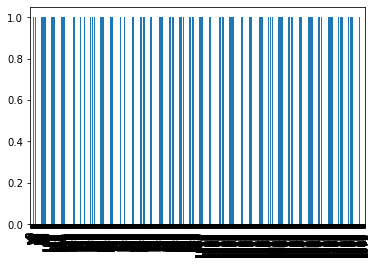

In [368]:
# convert high/low to 0/1
popularity_map = {'High':1, 'Low': 0}
train['popularity'] = train['popularity'].map(popularity_map)

#make a bar char visualizing the data
train['popularity'].plot(kind="bar")

In [370]:
#preprocessing install clm, removing + from the end, and , 

train['installs'] = train['installs'].str.replace('+', '')
train['installs'] = train['installs'].str.replace(',', '')
train.head()
train['installs']



0              50
1         5000000
2            1000
3        10000000
4            1000
          ...    
1970    100000000
1971       100000
1972          500
1973       100000
1974        10000
Name: installs, Length: 1975, dtype: object

In [372]:
#preprocessing price clm, removing $

train['price'] = train['price'].str.replace('$', '')
train.head()
train['price']

0          0
1          0
2       2.99
3          0
4          0
        ... 
1970       0
1971       0
1972    1.99
1973       0
1974       0
Name: price, Length: 1975, dtype: object

In [373]:
##preprocessing the size clm, k is for KB and M is for MB

def size_convert(val):
    value = val[-1:]

    if value == 'k':
        return float(val[:-1])*1000
    elif value == 'M':
        return float(val[:-1])*100000
    

In [374]:

train['size'] = train['size'].map(lambda x: size_convert(x))


In [375]:
#drop the update clm for now, process date later
train.drop(['last_update'], axis=1, inplace = True)
train.head()

,app_id,reviews,size,installs,price,latest_ver,popularity,category_AUTO_AND_VEHICLES,category_BEAUTY,category_BOOKS_AND_REFERENCE,category_BUSINESS,category_COMICS,category_COMMUNICATION,category_DATING,category_EDUCATION,category_ENTERTAINMENT,category_EVENTS,category_FAMILY,category_FINANCE,category_FOOD_AND_DRINK,category_GAME,category_HEALTH_AND_FITNESS,category_HOUSE_AND_HOME,category_LIBRARIES_AND_DEMO,category_LIFESTYLE,category_MAPS_AND_NAVIGATION,category_MEDICAL,category_NEWS_AND_MAGAZINES,category_PARENTING,category_PERSONALIZATION,category_PHOTOGRAPHY,category_PRODUCTIVITY,category_SHOPPING,category_SOCIAL,category_SPORTS,category_TOOLS,category_TRAVEL_AND_LOCAL,category_VIDEO_PLAYERS,category_WEATHER,suitable_for_Everyone,suitable_for_Everyone 10+,suitable_for_Mature 17+,suitable_for_Teen
0,330090,4,511000.000,50,0,1.4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,226147,568391,520000.000,5000000,0,4.3.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,107000,144,7000000.000,1000,2.99,1.0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,217582,1499466,9600000.000,10000000,0,1.25.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,370113,84,450000.000,1000,0,8.2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [376]:
#drop the latest_ver clm for now, process date later

train.drop(['latest_ver'], axis=1, inplace = True)
train.head()

,app_id,reviews,size,installs,price,popularity,category_AUTO_AND_VEHICLES,category_BEAUTY,category_BOOKS_AND_REFERENCE,category_BUSINESS,category_COMICS,category_COMMUNICATION,category_DATING,category_EDUCATION,category_ENTERTAINMENT,category_EVENTS,category_FAMILY,category_FINANCE,category_FOOD_AND_DRINK,category_GAME,category_HEALTH_AND_FITNESS,category_HOUSE_AND_HOME,category_LIBRARIES_AND_DEMO,category_LIFESTYLE,category_MAPS_AND_NAVIGATION,category_MEDICAL,category_NEWS_AND_MAGAZINES,category_PARENTING,category_PERSONALIZATION,category_PHOTOGRAPHY,category_PRODUCTIVITY,category_SHOPPING,category_SOCIAL,category_SPORTS,category_TOOLS,category_TRAVEL_AND_LOCAL,category_VIDEO_PLAYERS,category_WEATHER,suitable_for_Everyone,suitable_for_Everyone 10+,suitable_for_Mature 17+,suitable_for_Teen
0,330090,4,511000.000,50,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,226147,568391,520000.000,5000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,107000,144,7000000.000,1000,2.99,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,217582,1499466,9600000.000,10000000,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,370113,84,450000.000,1000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [377]:
# separate out X and y
X = train.drop(['popularity'], axis=1)
y = train['popularity']

y

0       1
1       1
2       1
3       1
4       1
       ..
1970    1
1971    1
1972    1
1973    1
1974    1
Name: popularity, Length: 1975, dtype: int64

In [378]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

In [379]:
from sklearn.model_selection import train_test_split

#split into training and validation data set
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.33, random_state=42)

logreg.fit(X_train, y_train)

y_pred=logreg.predict(X_test)

In [380]:
from sklearn import metrics

#get the cocnfusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7484662576687117


# Visualization, Modeling, Machine Learning

Build a model that can predict whether an app will become be trending or not and determine how different features influence the outcome. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of Accuracy.**
- **Read the test.csv file and prepare features for testing.**

In [381]:
#Loading Test data
test=pd.read_csv('test.csv')
test.head()

,app_id,category,reviews,size,installs,price,suitable_for,last_update,latest_ver
0,144236,TOOLS,262076,1.2M,"10,000,000+",0,Everyone,"January 4, 2018",1.0.2
1,881323,PHOTOGRAPHY,12204,6.8M,"1,000,000+",0,Everyone,"March 14, 2017",1.5.2.21
2,765524,TOOLS,632,8.2M,"500,000+",0,Everyone,"May 23, 2017",1.0
3,390533,BUSINESS,29,16M,500+,0,Everyone,"July 5, 2018",2.2.1335
4,817383,ART_AND_DESIGN,192,6.0M,"10,000+",0,Everyone,"April 25, 2018",1.5


In [382]:
test.drop(['last_update'], axis=1, inplace = True)


test.head()

,app_id,category,reviews,size,installs,price,suitable_for,latest_ver
0,144236,TOOLS,262076,1.2M,"10,000,000+",0,Everyone,1.0.2
1,881323,PHOTOGRAPHY,12204,6.8M,"1,000,000+",0,Everyone,1.5.2.21
2,765524,TOOLS,632,8.2M,"500,000+",0,Everyone,1.0
3,390533,BUSINESS,29,16M,500+,0,Everyone,2.2.1335
4,817383,ART_AND_DESIGN,192,6.0M,"10,000+",0,Everyone,1.5


In [383]:
test.drop(['latest_ver'], axis=1, inplace = True)
test.head()

,app_id,category,reviews,size,installs,price,suitable_for
0,144236,TOOLS,262076,1.2M,"10,000,000+",0,Everyone
1,881323,PHOTOGRAPHY,12204,6.8M,"1,000,000+",0,Everyone
2,765524,TOOLS,632,8.2M,"500,000+",0,Everyone
3,390533,BUSINESS,29,16M,500+,0,Everyone
4,817383,ART_AND_DESIGN,192,6.0M,"10,000+",0,Everyone


In [384]:
test['installs'] = test['installs'].str.replace('+', '')
test['installs'] = test['installs'].str.replace(',', '')
test['installs']

test.head()

,app_id,category,reviews,size,installs,price,suitable_for
0,144236,TOOLS,262076,1.2M,10000000,0,Everyone
1,881323,PHOTOGRAPHY,12204,6.8M,1000000,0,Everyone
2,765524,TOOLS,632,8.2M,500000,0,Everyone
3,390533,BUSINESS,29,16M,500,0,Everyone
4,817383,ART_AND_DESIGN,192,6.0M,10000,0,Everyone


In [385]:
test['price'] = test['price'].str.replace('$', '')
test['price']

test.head()



,app_id,category,reviews,size,installs,price,suitable_for
0,144236,TOOLS,262076,1.2M,10000000,0,Everyone
1,881323,PHOTOGRAPHY,12204,6.8M,1000000,0,Everyone
2,765524,TOOLS,632,8.2M,500000,0,Everyone
3,390533,BUSINESS,29,16M,500,0,Everyone
4,817383,ART_AND_DESIGN,192,6.0M,10000,0,Everyone


In [386]:
test['size'] = test['size'].map(lambda x: size_convert(x))

test.head()


,app_id,category,reviews,size,installs,price,suitable_for
0,144236,TOOLS,262076,120000.000,10000000,0,Everyone
1,881323,PHOTOGRAPHY,12204,680000.000,1000000,0,Everyone
2,765524,TOOLS,632,820000.000,500000,0,Everyone
3,390533,BUSINESS,29,1600000.000,500,0,Everyone
4,817383,ART_AND_DESIGN,192,600000.000,10000,0,Everyone


In [387]:
test_dummy_category = pd.get_dummies(test[['category']], drop_first=True)
test_dummy_category.head()


test = pd.concat([test, test_dummy_category], axis=1)
test = test.drop(['category'], axis=1)
test.head()


,app_id,reviews,size,installs,price,suitable_for,category_AUTO_AND_VEHICLES,category_BEAUTY,category_BOOKS_AND_REFERENCE,category_BUSINESS,category_COMICS,category_COMMUNICATION,category_DATING,category_EDUCATION,category_ENTERTAINMENT,category_EVENTS,category_FAMILY,category_FINANCE,category_FOOD_AND_DRINK,category_GAME,category_HEALTH_AND_FITNESS,category_HOUSE_AND_HOME,category_LIBRARIES_AND_DEMO,category_LIFESTYLE,category_MAPS_AND_NAVIGATION,category_MEDICAL,category_NEWS_AND_MAGAZINES,category_PARENTING,category_PERSONALIZATION,category_PHOTOGRAPHY,category_PRODUCTIVITY,category_SHOPPING,category_SOCIAL,category_SPORTS,category_TOOLS,category_TRAVEL_AND_LOCAL,category_VIDEO_PLAYERS,category_WEATHER
0,144236,262076,120000.000,10000000,0,Everyone,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,881323,12204,680000.000,1000000,0,Everyone,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,765524,632,820000.000,500000,0,Everyone,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,390533,29,1600000.000,500,0,Everyone,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,817383,192,600000.000,10000,0,Everyone,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [388]:

dummy_suitable = pd.get_dummies(test[['suitable_for']], drop_first=True)
dummy_suitable.head()
dummy_suitable.shape

#concat dummy 
test = pd.concat([test, dummy_suitable], axis=1)
test = test.drop(['suitable_for'], axis=1)
test.head()
test.shape




(1018, 41)

In [389]:
y_pred_test=logreg.predict(test)
y_pred_test

array([1, 1, 1, ..., 1, 1, 1])

In [390]:
column_values = ['label_pred']
label_pred = pd.DataFrame(data=y_pred_test, columns = column_values)
submission_df =  pd.concat([test, label_pred], axis=1)


In [391]:
submission_df


,app_id,reviews,size,installs,price,category_AUTO_AND_VEHICLES,category_BEAUTY,category_BOOKS_AND_REFERENCE,category_BUSINESS,category_COMICS,category_COMMUNICATION,category_DATING,category_EDUCATION,category_ENTERTAINMENT,category_EVENTS,category_FAMILY,category_FINANCE,category_FOOD_AND_DRINK,category_GAME,category_HEALTH_AND_FITNESS,category_HOUSE_AND_HOME,category_LIBRARIES_AND_DEMO,category_LIFESTYLE,category_MAPS_AND_NAVIGATION,category_MEDICAL,category_NEWS_AND_MAGAZINES,category_PARENTING,category_PERSONALIZATION,category_PHOTOGRAPHY,category_PRODUCTIVITY,category_SHOPPING,category_SOCIAL,category_SPORTS,category_TOOLS,category_TRAVEL_AND_LOCAL,category_VIDEO_PLAYERS,category_WEATHER,suitable_for_Everyone,suitable_for_Everyone 10+,suitable_for_Mature 17+,suitable_for_Teen,label_pred
0,144236,262076,120000.000,10000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,881323,12204,680000.000,1000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,765524,632,820000.000,500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,390533,29,1600000.000,500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,817383,192,600000.000,10000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,990872,357944,1200000.000,10000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1014,850376,125,430000.000,10000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1015,983504,315,1400000.000,10000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1016,886153,11,350000.000,500,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [392]:
submission_df = submission_df[['app_id','label_pred']]


In [398]:
#convert back to high low - error, todo: fix
popularity_map = {1:'High', 0: 'Low'}
test['label_pred'] = test['label_pred'].map(popularity_map)

KeyError: 'label_pred'

In [394]:
submission_df

,app_id,label_pred
0,144236,1
1,881323,1
2,765524,1
3,390533,1
4,817383,1
...,...,...
1013,990872,1
1014,850376,1
1015,983504,1
1016,886153,1




**Show management the most important features in the model.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


In [396]:
coefs=logreg.coef_[0]
top_twenty = np.argpartition(coefs, -20)[-20:] #gives the index


In [397]:
top_twenty

#get the featuure names using the index

array([19, 14, 39, 21,  8, 26,  6, 13, 12, 32, 40, 31, 27, 24,  1, 18, 37,
       15,  2,  0])

- **Submit the predictions on the test dataset using your optimized model**

    For each record in the test set (`test.csv`), predict the `popularity` variable. Submit a CSV file with a header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:
   - **app_id**
   - **popularity**

In [ ]:
#Submission
submission_df.to_csv('submissions.csv',index=False)